<a href="https://colab.research.google.com/github/DanielaaVargas/NINE/blob/main/Copy_of_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install astropy==3.5;
!pip install pyregion;
!pip install photutils;
!pip install regions;
!pip install scipy;
!pip install aplpy

In [ ]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import pyregion
from astropy.coordinates import Angle
from astropy import units as u
from astropy.stats import SigmaClip
from photutils.background import StdBackgroundRMS
from regions import Regions
from pyregion import get_mask
import aplpy
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Drive_path = '/content/drive/MyDrive/NINE/'
Image = Drive_path + 'Imaging/NGC5258.fits'

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.
INFO:astropy:Auto-setting vmin to -9.132e-05
INFO:astropy:Auto-setting vmax to  4.295e-04


INFO: Auto-setting vmin to -9.132e-05 [aplpy.core]
INFO: Auto-setting vmax to  4.295e-04 [aplpy.core]


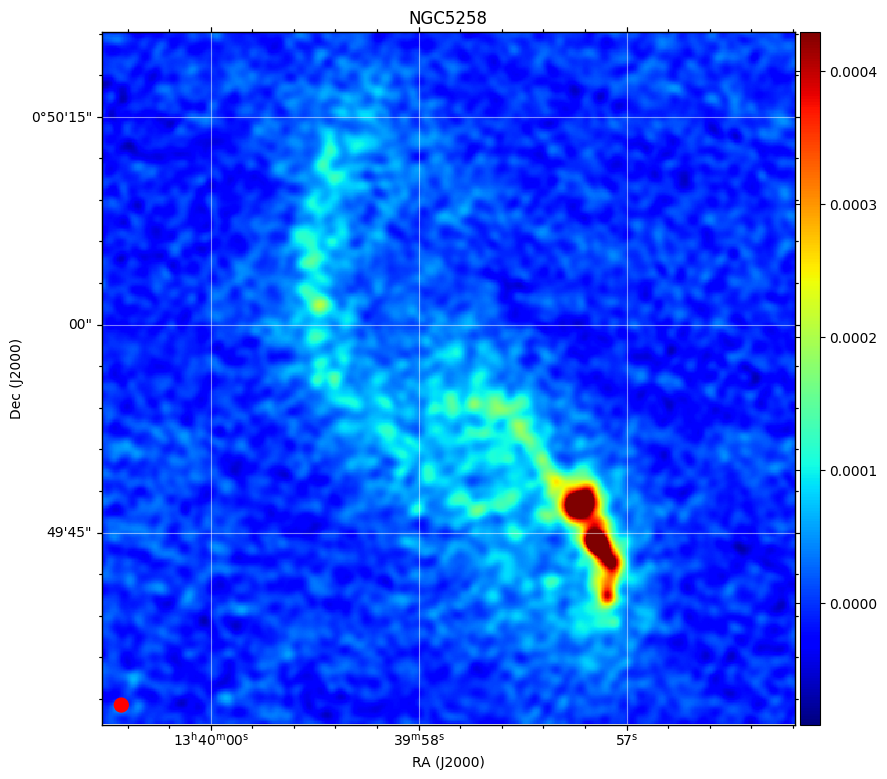

In [ ]:
iMg = aplpy.FITSFigure(Image)
iMg.set_title("NGC5258")
iMg.show_colorscale(cmap='jet')
iMg.add_colorbar()
iMg.add_grid()
iMg.add_beam()
iMg.beam.set_color('red')

In [ ]:
IMG =fits.open('/content/drive/MyDrive/NINE/Imaging/NGC5258.fits')
image = IMG[0].data.sum()
image

3.587452

In [ ]:
from astropy.units.cgs import K

vla_image = fits.getdata(Image)

region_file = Drive_path + 'Imaging/Regions'
region = pyregion.open(region_file)
region

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb7 in position 37440: invalid start byte

In [ ]:
 rms_values = []
  for K in range(len(region)):
    region = pyregion.open(region_file)
    m=len(region)
    del region[0:K]
    del region[1:m]

    mask = region.get_mask(shape=(vla_image.shape[0],vla_image.shape[1]),header=header)
    #mask = get_mask(region,data)
    maskdata= np.multiply(vla_image,mask)
    N=len(maskdata[maskdata!=0])
    rms_values.append(np.sqrt(np.sum(maskdata**2)/N))
  avg_rms = np.mean(rms_values)
  avg_rms